In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib notebook
from matplotlib import pyplot

### Sampling rate

In [4]:
sampling_rate = '10L' # 10 ms

In [5]:
rolling_window_size = 300

In [6]:
##TODO: accept an input directory and process all the files 

In [7]:
raw_acc_file = 'raw_acc.txt'

In [8]:
raw_obd_file = 'raw_obd.txt'

### Reference file

In [9]:
ref_DF =  pd.read_csv(raw_obd_file)

In [10]:
ref_variable = 'timestamp' # variable of obd file

### Processing

In [11]:
acc_DF = pd.read_csv(raw_acc_file)

In [12]:
obd_DF = pd.read_csv(raw_obd_file)

In [13]:
acc_DF.head(5)

,timestamp,sys_time,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
0,0.0,1508975971982,2605508272423122,9.662998,0.517148,-0.612916
1,5.0,1508975971988,2605508277444997,9.691729,0.402226,-0.641646
2,9.0,1508975971993,2605508282402810,9.624691,0.191536,-0.536301
3,15.0,1508975971998,2605508287426247,9.634268,-0.019154,-0.296881
4,19.0,1508975972002,2605508292415310,9.749189,-0.114922,0.076614


In [14]:
obd_DF.head(5)

,timestamp,RPM,Speed,Consumption_Rate,AirFuelRatio,ThrottlePosition,MassAirFlow,FuelType,FuelLevel,FuelTrim,...,AirIntakeTemperature,AmbientAirTemperature,EngineCoolantTemperature,FuelPressure,DistanceMIL,DistanceSinceCCC,EquivalentRatio,IgnitionMonitor,ModuleVoltage,PendingTroubleCodes
0,1508975975440,1667RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1508975976257,1652RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1508975976834,1646RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1508975977029,1663RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1508975977207,1660RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
start_time = int(ref_DF[ref_variable].head(1))

In [16]:
start_time

1508975975440

In [17]:
end_time = int(ref_DF[ref_variable].tail(1))

In [18]:
end_time

1508976453224

### Sync start and end time

In [19]:
#TODO: repeat for all other files

In [20]:
acc_DF = acc_DF.loc[(acc_DF['sys_time'] >= start_time) & (acc_DF['sys_time'] <= end_time)]

In [21]:
acc_DF.head(5)

,timestamp,sys_time,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
692,3460.0,1508975975445,2605511732459060,9.720459,0.210690,0.287304
693,3465.0,1508975975448,2605511737440310,9.710882,0.296881,0.392649
694,3470.0,1508975975453,2605511742429372,9.662998,0.373495,0.220267
695,3474.0,1508975975458,2605511747419997,9.548077,0.363919,0.306458
696,3479.0,1508975975462,2605511752409060,9.356541,0.335188,0.325611


### Change the default time stamp to 0

In [22]:
acc_DF['sys_time'] = acc_DF['sys_time'] - start_time

In [23]:
obd_DF['timestamp'] = obd_DF['timestamp'] - start_time

In [24]:
acc_DF.head(5)

,timestamp,sys_time,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
692,3460.0,5,2605511732459060,9.720459,0.210690,0.287304
693,3465.0,8,2605511737440310,9.710882,0.296881,0.392649
694,3470.0,13,2605511742429372,9.662998,0.373495,0.220267
695,3474.0,18,2605511747419997,9.548077,0.363919,0.306458
696,3479.0,22,2605511752409060,9.356541,0.335188,0.325611


In [25]:
obd_DF.head(5)

,timestamp,RPM,Speed,Consumption_Rate,AirFuelRatio,ThrottlePosition,MassAirFlow,FuelType,FuelLevel,FuelTrim,...,AirIntakeTemperature,AmbientAirTemperature,EngineCoolantTemperature,FuelPressure,DistanceMIL,DistanceSinceCCC,EquivalentRatio,IgnitionMonitor,ModuleVoltage,PendingTroubleCodes
0,0,1667RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,817,1652RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1394,1646RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1589,1663RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1767,1660RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Convert timestamp to Epoch for sampling

In [26]:
acc_DF['sys_time'] = pd.to_datetime(acc_DF['sys_time'], unit='ms')

In [27]:
obd_DF['timestamp'] = pd.to_datetime(obd_DF['timestamp'], unit='ms')

In [28]:
acc_DF.head(5)

,timestamp,sys_time,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
692,3460.0,1970-01-01 00:00:00.005,2605511732459060,9.720459,0.210690,0.287304
693,3465.0,1970-01-01 00:00:00.008,2605511737440310,9.710882,0.296881,0.392649
694,3470.0,1970-01-01 00:00:00.013,2605511742429372,9.662998,0.373495,0.220267
695,3474.0,1970-01-01 00:00:00.018,2605511747419997,9.548077,0.363919,0.306458
696,3479.0,1970-01-01 00:00:00.022,2605511752409060,9.356541,0.335188,0.325611


In [29]:
obd_DF.head(5)

,timestamp,RPM,Speed,Consumption_Rate,AirFuelRatio,ThrottlePosition,MassAirFlow,FuelType,FuelLevel,FuelTrim,...,AirIntakeTemperature,AmbientAirTemperature,EngineCoolantTemperature,FuelPressure,DistanceMIL,DistanceSinceCCC,EquivalentRatio,IgnitionMonitor,ModuleVoltage,PendingTroubleCodes
0,1970-01-01 00:00:00.000,1667RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-01-01 00:00:00.817,1652RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-01-01 00:00:01.394,1646RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-01-01 00:00:01.589,1663RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-01-01 00:00:01.767,1660RPM,0km/h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Perform resampling 

In [30]:
###TODO: Verify resampling

In [31]:
len(acc_DF.index)

95557

In [32]:
acc_DF = acc_DF.resample(sampling_rate, on='sys_time').mean()

In [33]:
acc_DF.to_csv("new.txt")

In [34]:
acc_DF1 = pd.read_csv("new.txt")

In [35]:
acc_DF1.head(5)

,sys_time,timestamp,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
0,1970-01-01 00:00:00.000,3462.5,2.605512e+15,9.715671,0.253785,0.339977
1,1970-01-01 00:00:00.010,3472.0,2.605512e+15,9.605538,0.368707,0.263362
2,1970-01-01 00:00:00.020,3482.0,2.605512e+15,9.399636,0.296881,0.378284
3,1970-01-01 00:00:00.030,3492.0,2.605512e+15,9.653422,0.138864,0.363919
4,1970-01-01 00:00:00.040,3502.0,2.605512e+15,9.892841,0.047884,0.387861


In [36]:
len(acc_DF.index)

47779

In [37]:
acc_DF = acc_DF.dropna()

In [38]:
len(acc_DF.index)

47602

In [39]:
acc_DF.head(5)

,timestamp,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
sys_time,,,,,
1970-01-01 00:00:00.000,3462.5,2.605512e+15,9.715671,0.253785,0.339977
1970-01-01 00:00:00.010,3472.0,2.605512e+15,9.605538,0.368707,0.263362
1970-01-01 00:00:00.020,3482.0,2.605512e+15,9.399636,0.296881,0.378284
1970-01-01 00:00:00.030,3492.0,2.605512e+15,9.653422,0.138864,0.363919
1970-01-01 00:00:00.040,3502.0,2.605512e+15,9.892841,0.047884,0.387861


In [40]:
len(obd_DF.index)

4384

In [41]:
obd_DF1 = obd_DF.dropna(thresh=1, axis='columns')

In [42]:
obd_DF1.head(5)

,timestamp,RPM,Speed
0,1970-01-01 00:00:00.000,1667RPM,0km/h
1,1970-01-01 00:00:00.817,1652RPM,0km/h
2,1970-01-01 00:00:01.394,1646RPM,0km/h
3,1970-01-01 00:00:01.589,1663RPM,0km/h
4,1970-01-01 00:00:01.767,1660RPM,0km/h


In [43]:
obd_DF1['RPM'] = obd_DF['RPM'].str.strip("RPM").astype('int64')

/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
obd_DF1['Speed'] = obd_DF['Speed'].str.strip("km/h").astype('int64')

/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
obd_DF1.head(5)

,timestamp,RPM,Speed
0,1970-01-01 00:00:00.000,1667,0
1,1970-01-01 00:00:00.817,1652,0
2,1970-01-01 00:00:01.394,1646,0
3,1970-01-01 00:00:01.589,1663,0
4,1970-01-01 00:00:01.767,1660,0


In [46]:
obd_DF1 = obd_DF1.rename(index=str,columns = {"timestamp":"sys_time"})

In [47]:
obd_DF1 = obd_DF1.resample(sampling_rate, on='sys_time').sum()

In [48]:
obd_DF1 = obd_DF1.dropna()

In [49]:
obd_DF1.head(5)

,RPM,Speed
sys_time,,
1970-01-01 00:00:00.000,1667.0,0.0
1970-01-01 00:00:00.810,1652.0,0.0
1970-01-01 00:00:01.390,1646.0,0.0
1970-01-01 00:00:01.580,1663.0,0.0
1970-01-01 00:00:01.760,1660.0,0.0


In [50]:
len(obd_DF1.index)

4384

<IPython.core.display.Javascript object>


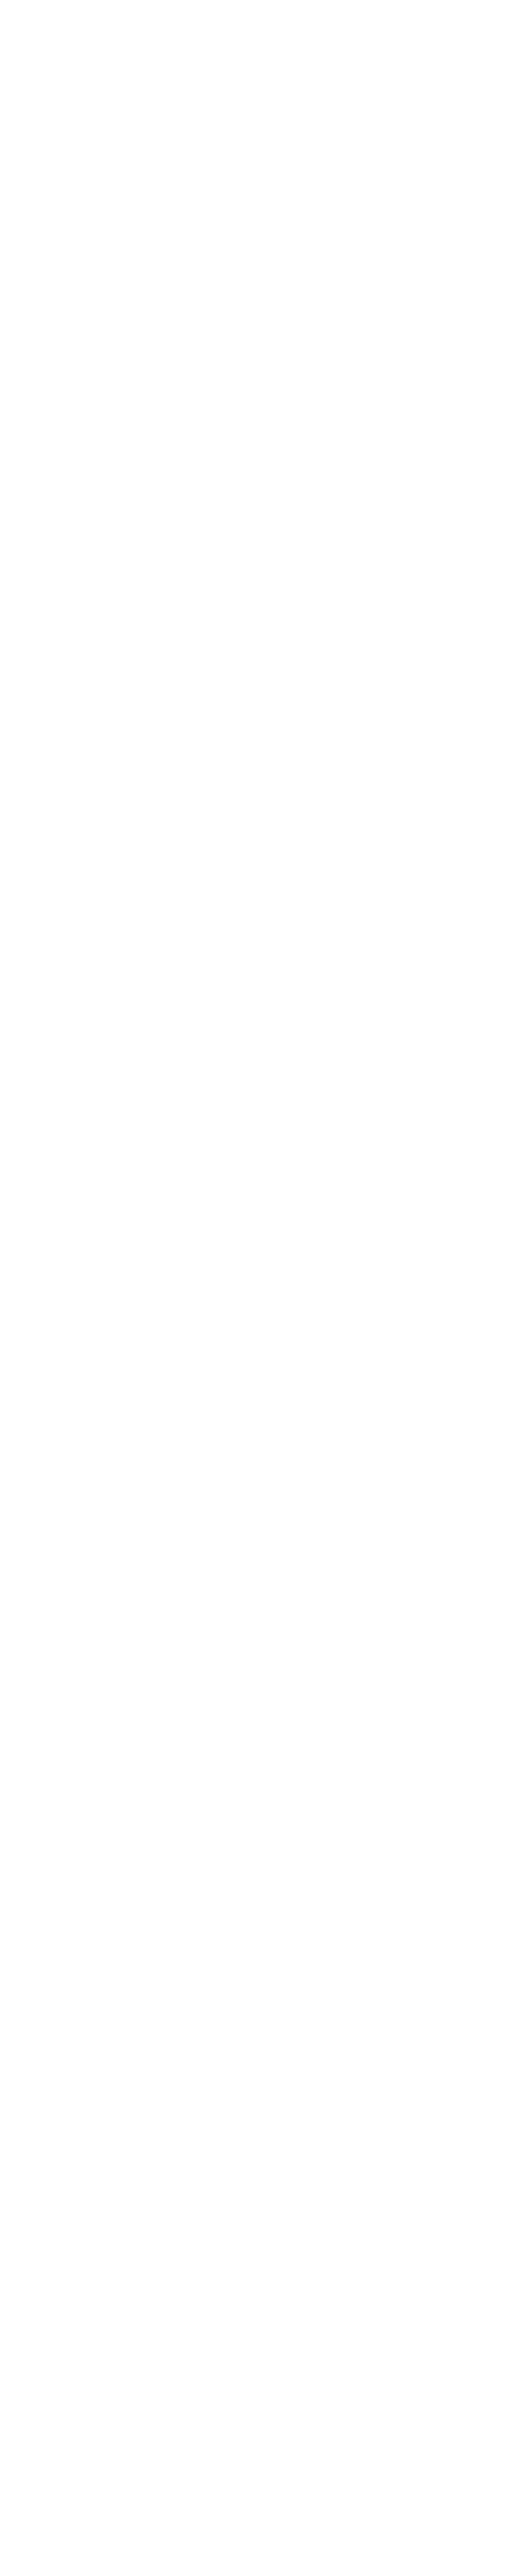

<IPython.core.display.Javascript object>


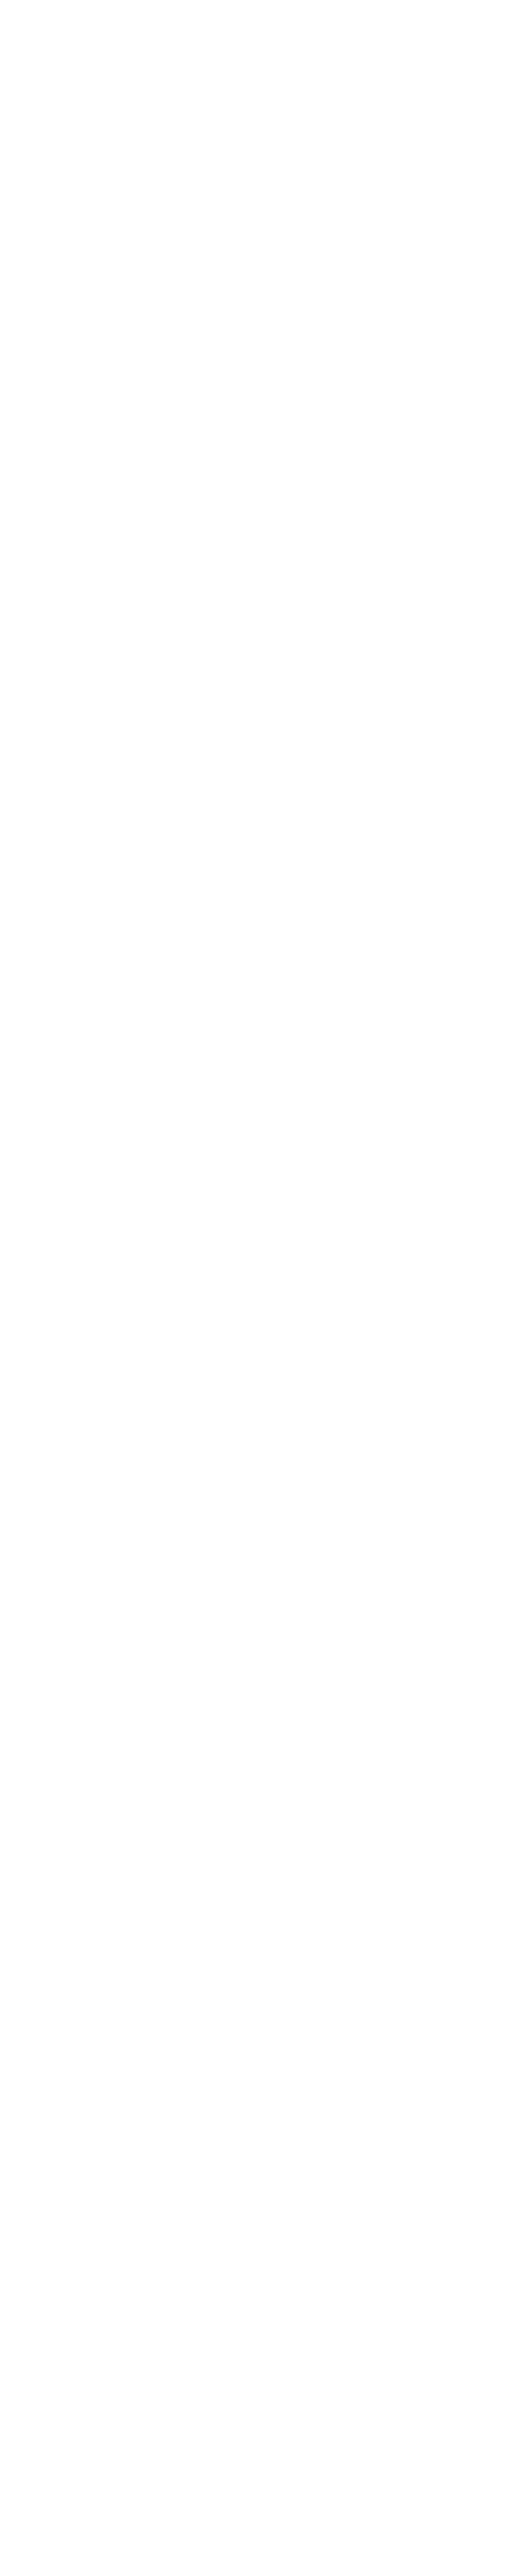

In [53]:
pyplot.figure(figsize=(20,100))

In [51]:
obd_DF1.plot()

<IPython.core.display.Javascript object>

In [54]:
pyplot.show()

In [55]:
acc_DF = acc_DF.astype('float64')

In [56]:
acc_DF.head(5)

,timestamp,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
sys_time,,,,,
1970-01-01 00:00:00.000,3462.5,2.605512e+15,9.715671,0.253785,0.339977
1970-01-01 00:00:00.010,3472.0,2.605512e+15,9.605538,0.368707,0.263362
1970-01-01 00:00:00.020,3482.0,2.605512e+15,9.399636,0.296881,0.378284
1970-01-01 00:00:00.030,3492.0,2.605512e+15,9.653422,0.138864,0.363919
1970-01-01 00:00:00.040,3502.0,2.605512e+15,9.892841,0.047884,0.387861


In [57]:
acc_DF1 = acc_DF.dropna()

In [58]:
acc_DF1.head(5)

,timestamp,abs_timestamp,raw_x_acc,raw_y_acc,raw_z_acc
sys_time,,,,,
1970-01-01 00:00:00.000,3462.5,2.605512e+15,9.715671,0.253785,0.339977
1970-01-01 00:00:00.010,3472.0,2.605512e+15,9.605538,0.368707,0.263362
1970-01-01 00:00:00.020,3482.0,2.605512e+15,9.399636,0.296881,0.378284
1970-01-01 00:00:00.030,3492.0,2.605512e+15,9.653422,0.138864,0.363919
1970-01-01 00:00:00.040,3502.0,2.605512e+15,9.892841,0.047884,0.387861


In [59]:
acc_DF1 = acc_DF.drop(['abs_timestamp', 'timestamp'],axis = 1)

In [60]:
obd_DF1.head(5)

,RPM,Speed
sys_time,,
1970-01-01 00:00:00.000,1667.0,0.0
1970-01-01 00:00:00.810,1652.0,0.0
1970-01-01 00:00:01.390,1646.0,0.0
1970-01-01 00:00:01.580,1663.0,0.0
1970-01-01 00:00:01.760,1660.0,0.0


In [61]:
acc_DF1.to_csv("acc_DF1.txt")

acc_DF1 = pd.read_csv("acc_DF1.txt")
obd_DF1.to_csv("obd_DF1.txt")

obd_DF1 = pd.read_csv("obd_DF1.txt")

In [62]:
acc_DF1.head()

,sys_time,raw_x_acc,raw_y_acc,raw_z_acc
0,1970-01-01 00:00:00.000,9.715671,0.253785,0.339977
1,1970-01-01 00:00:00.010,9.605538,0.368707,0.263362
2,1970-01-01 00:00:00.020,9.399636,0.296881,0.378284
3,1970-01-01 00:00:00.030,9.653422,0.138864,0.363919
4,1970-01-01 00:00:00.040,9.892841,0.047884,0.387861


In [63]:
import math

In [64]:
acc_DF1['acc'] = ((acc_DF1['raw_x_acc'] ** 2) + (acc_DF1['raw_y_acc']**2) + (acc_DF1['raw_z_acc']**2)) * (0.25)

In [65]:
acc_DF1['acc'] = np.sqrt(acc_DF1['acc'])

In [66]:
acc_DF1.tail()

,sys_time,raw_x_acc,raw_y_acc,raw_z_acc,acc
47597,1970-01-01 00:07:57.740,9.662998,-0.215478,0.809240,4.849609
47598,1970-01-01 00:07:57.750,9.624691,-0.239420,0.684742,4.825994
47599,1970-01-01 00:07:57.760,9.648633,-0.258574,0.684742,4.838178
47600,1970-01-01 00:07:57.770,9.777920,-0.172383,1.029507,4.916740
47601,1970-01-01 00:07:57.780,9.720459,-0.076614,1.005565,4.886316


In [67]:
acc_DF2 = acc_DF1.merge(obd_DF1,how = 'left').drop(['RPM','raw_x_acc','raw_y_acc','raw_z_acc'],axis = 1)

In [68]:
acc_DF3 = acc_DF1.merge(obd_DF1,how = 'left').drop(['RPM','acc'],axis = 1)

In [69]:
acc_DF5 = acc_DF1.merge(obd_DF1,how = 'left').drop(['acc'],axis = 1)

In [70]:
acc_DF5.head()

,sys_time,raw_x_acc,raw_y_acc,raw_z_acc,RPM,Speed
0,1970-01-01 00:00:00.000,9.715671,0.253785,0.339977,1667.0,0.0
1,1970-01-01 00:00:00.010,9.605538,0.368707,0.263362,NaN,NaN
2,1970-01-01 00:00:00.020,9.399636,0.296881,0.378284,NaN,NaN
3,1970-01-01 00:00:00.030,9.653422,0.138864,0.363919,NaN,NaN
4,1970-01-01 00:00:00.040,9.892841,0.047884,0.387861,NaN,NaN


In [71]:
acc_DF5 = acc_DF5.interpolate(method='linear')

In [72]:
acc_DF3 = acc_DF3.interpolate(method='linear')

In [73]:
acc_DF4 = acc_DF3.rolling(rolling_window_size, min_periods=1).sum()

In [74]:
acc_DF5.tail()

,sys_time,raw_x_acc,raw_y_acc,raw_z_acc,RPM,Speed
47597,1970-01-01 00:07:57.740,9.662998,-0.215478,0.809240,664.545455,0.0
47598,1970-01-01 00:07:57.750,9.624691,-0.239420,0.684742,664.909091,0.0
47599,1970-01-01 00:07:57.760,9.648633,-0.258574,0.684742,665.272727,0.0
47600,1970-01-01 00:07:57.770,9.777920,-0.172383,1.029507,665.636364,0.0
47601,1970-01-01 00:07:57.780,9.720459,-0.076614,1.005565,666.000000,0.0


In [75]:
acc_DF4 = acc_DF4.set_index('sys_time')

<IPython.core.display.Javascript object>


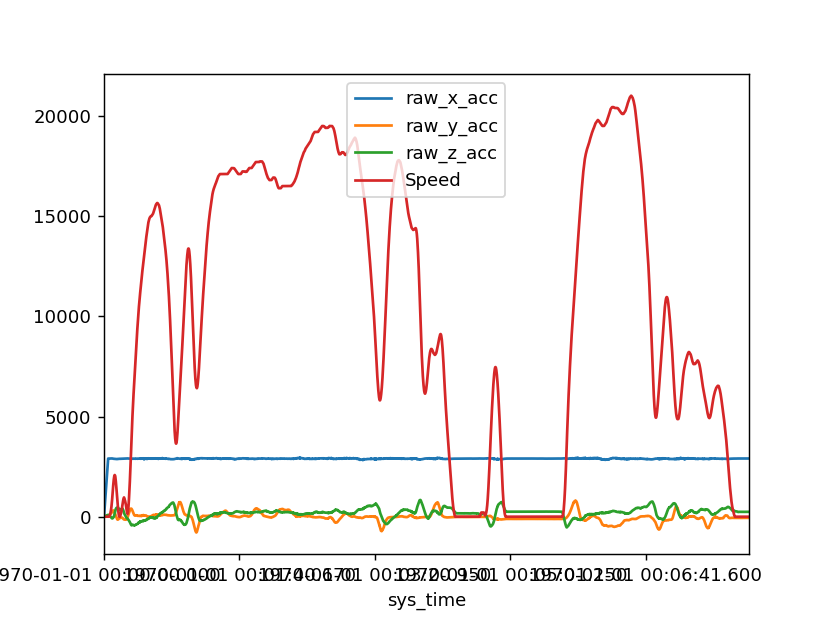

In [76]:
acc_DF4.plot()

In [119]:
from datetime import datetime
import calendar
import time

In [77]:
acc_DF3.tail()

,sys_time,raw_x_acc,raw_y_acc,raw_z_acc,Speed
47597,1970-01-01 00:07:57.740,9.662998,-0.215478,0.809240,0.0
47598,1970-01-01 00:07:57.750,9.624691,-0.239420,0.684742,0.0
47599,1970-01-01 00:07:57.760,9.648633,-0.258574,0.684742,0.0
47600,1970-01-01 00:07:57.770,9.777920,-0.172383,1.029507,0.0
47601,1970-01-01 00:07:57.780,9.720459,-0.076614,1.005565,0.0


<IPython.core.display.Javascript object>


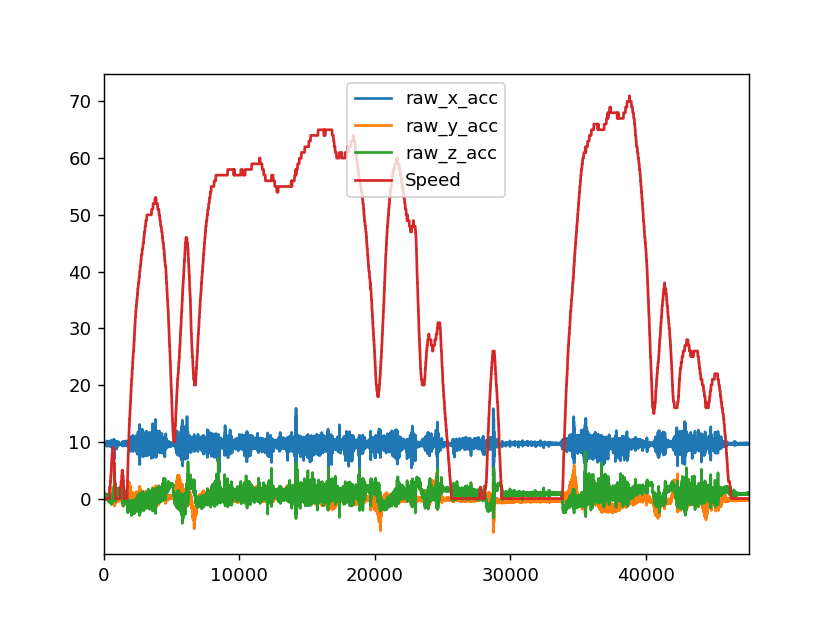

In [78]:
acc_DF3.plot()

In [76]:
from datetime import datetime
import calendar
import time

In [80]:
#acc_DF3.head()
acc_DF4.tail()

,raw_x_acc,raw_y_acc,raw_z_acc,Speed
sys_time,,,,
1970-01-01 00:07:57.740,2905.421264,-57.394601,244.056141,-2.252643e-13
1970-01-01 00:07:57.750,2905.456379,-57.452062,243.981122,-2.252643e-13
1970-01-01 00:07:57.760,2905.394130,-57.519100,243.842259,-2.252643e-13
1970-01-01 00:07:57.770,2905.456380,-57.523888,244.000276,-2.252643e-13
1970-01-01 00:07:57.780,2905.465957,-57.466427,244.167870,-2.252643e-13


In [83]:
acc_DF4.head(5)

,raw_x_acc,raw_y_acc,raw_z_acc,Speed
sys_time,,,,
1970-01-01 00:00:00.000,9.715671,0.253785,0.339977,0.0
1970-01-01 00:00:00.010,19.321208,0.622492,0.603339,0.0
1970-01-01 00:00:00.020,28.720845,0.919373,0.981623,0.0
1970-01-01 00:00:00.030,38.374266,1.058237,1.345541,0.0
1970-01-01 00:00:00.040,48.267108,1.106121,1.733402,0.0


<IPython.core.display.Javascript object>


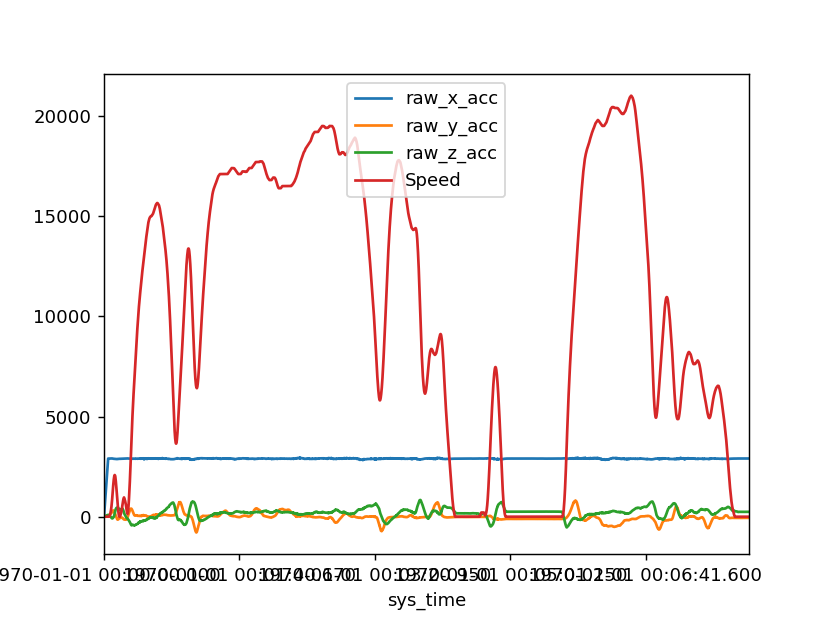

In [84]:
acc_DF4.plot()

In [ ]:
acc_DF4['sys_time'][0] = 0.0001
acc_DF4['obd_acc'] = acc_DF4['Speed'] / acc_DF4['sys_time']

In [85]:
acc_DF4.head(5)

,raw_x_acc,raw_y_acc,raw_z_acc,Speed
sys_time,,,,
1970-01-01 00:00:00.000,9.715671,0.253785,0.339977,0.0
1970-01-01 00:00:00.010,19.321208,0.622492,0.603339,0.0
1970-01-01 00:00:00.020,28.720845,0.919373,0.981623,0.0
1970-01-01 00:00:00.030,38.374266,1.058237,1.345541,0.0
1970-01-01 00:00:00.040,48.267108,1.106121,1.733402,0.0


In [86]:
acc_DF3['obd_acc'] = acc_DF3['obd_acc'].astype('float64')

KeyError: 'obd_acc'

In [87]:
acc_DF4['obd_acc'] = acc_DF4['obd_acc'].astype('float64')

KeyError: 'obd_acc'

In [88]:
acc_DF4['raw_z_acc'].corr(acc_DF4['obd_acc'],method='pearson')

KeyError: 'obd_acc'

In [89]:
from statsmodels.graphics.tsaplots import plot_acf

/home/anurag/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [90]:
#plot_acf(acc_DF3['Speed'],lags=50)

In [91]:
#plot_acf(acc_DF3['acc'],lags=50)

Creating new files

In [ ]:
obd_DF1 = obd_DF1.rename(index=str,columns = {"timestamp":"sys_time"}).head(5)

In [ ]:
obd_DF1['RPM'] = obd_DF1['RPM'].astype('str') + 'RPM'

In [ ]:
obd_DF1['Speed'] = obd_DF1['Speed'].astype('str') + 'km/h'

In [ ]:
acc_DF1.to_csv("acc.txt")

acc_DF1 = pd.read_csv("acc.txt")
obd_DF1.to_csv("obd.txt")

obd_DF1 = pd.read_csv("obd.txt")